In [1]:
RANDOM_SEED = 42

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
train_stage_1_3_OCSVM = pd.read_csv("data/train_stage_1_3_OCSVM.csv")

X_train = train_stage_1_3_OCSVM.drop(columns=["Label"])
y_train = train_stage_1_3_OCSVM["Label"]

del train_stage_1_3_OCSVM

In [4]:
pca = PCA(n_components=56, random_state=42)
pca_X_train = pca.fit_transform(X_train)

model_ocsvm = OneClassSVM(gamma=0.0632653906314333, nu=0.0002316646233151, verbose=True)
model_ocsvm.fit(pca_X_train, y_train)

[LibSVM]

OneClassSVM(gamma=0.0632653906314333, nu=0.0002316646233151, verbose=True)

In [5]:
# Optimized pipelines
f = open("Repositório_Base/models/stage1_ocsvm.p","rb")
stage1 = pickle.load(f)
f.close()

stage1.fit(X_train, y_train)

d:\Disciplinas\intrusao\Projeto\Sistema_Hierarquico\Deteccao_de_Intrusao_Hierarquica_Multiestagio\env\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator QuantileTransformer from version 1.1.1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Disciplinas\intrusao\Projeto\Sistema_Hierarquico\Deteccao_de_Intrusao_Hierarquica_Multiestagio\env\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.1.1 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Disciplinas\intrusao\Projeto\Sistema_Hierarqu

[LibSVM]

Pipeline(steps=[('scaler',
                 QuantileTransformer(output_distribution='normal',
                                     subsample=100000)),
                ('pca', PCA(n_components=56, random_state=42)),
                ('ocsvm',
                 OneClassSVM(gamma=0.0632653906314333, nu=0.0002316646233151,
                             verbose=True))])

In [14]:
y_pred_train = stage1.predict(X_train) #marcando 1 como benigno
y_pred_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
y_score_train = stage1.score_samples(X_train)
y_score_train.min(),y_score_train.max()

(0.004610011420169892, 0.008575120473614287)

In [9]:
validation_stage_1_3_OCSVM = pd.read_csv("data/validation_stage_1_3.csv")

X_val = validation_stage_1_3_OCSVM.drop(columns=["Label"])
y_val = validation_stage_1_3_OCSVM["Label"]

y_val = np.where(y_val == "BENIGN", 0,1) # marcando 1 como anomalia

del validation_stage_1_3_OCSVM

In [32]:
y_pred = stage1.predict(X_val)
y_score = stage1.score_samples(X_val)
print(y_pred[:10])
print(y_score[:10])


In [21]:
np.unique(y_val, return_counts= True)

(array([0, 1]), array([129485,   6820], dtype=int64))

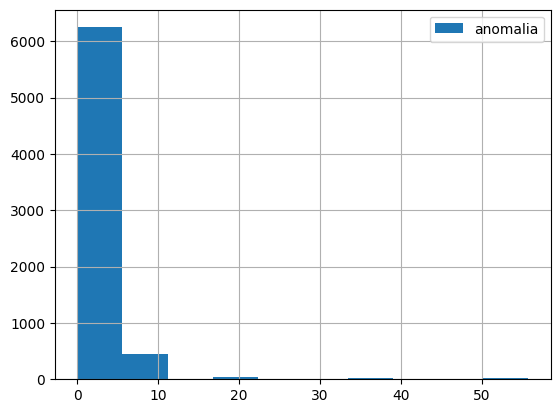

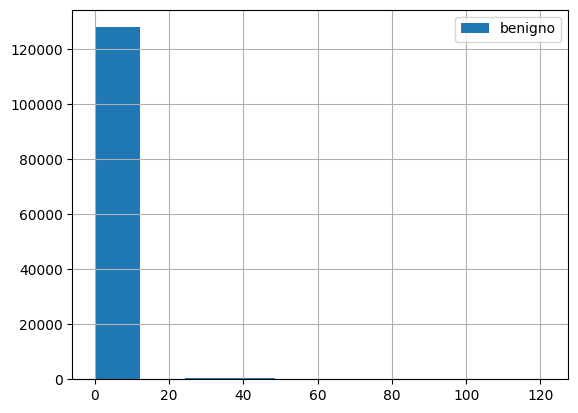

8.673617379884035e-13 121.43614366604949
6.652664530371055e-10 55.77492657918987


In [30]:
y_score_benigno  = pd.Series(y_score[y_val == 0]*1e6)
y_score_anomalia = pd.Series(y_score[y_val == 1]*1e6)


y_score_anomalia.hist(label= "anomalia")
plt.legend()
plt.show()

y_score_benigno.hist(label= "benigno")
plt.legend()
plt.show()

print(y_score_benigno.min(),y_score_benigno.max())
print(y_score_anomalia.min(),y_score_anomalia.max())


In [ ]:
y_pred_ = np.where(y_pred== -1, 1,0)
print(classification_report(y_val, y_pred_))
print(roc_auc_score(y_val, y_score))